# EDSA APPLE PRICES

# REGRESSION_AM6_DFST_PREDICT
@ Melusi Zwane
@ Itumeleng Mabaso
@ Onkarabile Tshele
@ lydia lehutjo
@ Samuel Moloantoa

## Objective
In this predict we should do the following:

- Be able to clean the given data
- Be able to intercept the type of graph needed
- Be able to create a code to correctly predict the given data

# Importing data and plotting

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

# Regression models
from sklearn.linear_model import LinearRegression

# Model slection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Other
from scipy import stats
import math
import pickle

we will load the data onto the notebook

Challenge Description
Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season?

With this context, EDSA is challenging you to construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.



In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/df-train_set.csv')

In [3]:
test = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/df-test_set.csv')

In [5]:
sample_submission = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/sample_submission.csv')

In [6]:
# will show the first few data
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [7]:
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [8]:
train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [9]:
test.isnull().sum()

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

In [10]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


In [11]:
test.describe()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,343.000000,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,197.886752,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,1.000000,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,172.000000,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,343.000000,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,514.000000,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,685.000000,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


In [12]:
train['Province']

0                         CAPE
1                         CAPE
2                      GAUTENG
3                    TRANSVAAL
4            WESTERN FREESTATE
                 ...          
64371                TRANSVAAL
64372    IMPORTS - OUTSIDE RSA
64373                TRANSVAAL
64374                    NATAL
64375                     CAPE
Name: Province, Length: 64376, dtype: object

In [13]:
test['Province']

0      W.CAPE-BERGRIVER ETC
1      W.CAPE-BERGRIVER ETC
2      W.CAPE-BERGRIVER ETC
3      W.CAPE-BERGRIVER ETC
4      W.CAPE-BERGRIVER ETC
               ...         
680    W.CAPE-BERGRIVER ETC
681                    CAPE
682    W.CAPE-BERGRIVER ETC
683                    CAPE
684                    CAPE
Name: Province, Length: 685, dtype: object

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


In [16]:
train['avg_price_per_kg'].unique()

array([ 9.3 ,  8.51,  3.68, ..., 34.09, 13.95, 52.11])

In [17]:
# missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [18]:
missing_values_table(train)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [19]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [20]:
m = train['avg_price_per_kg'].mean()

In [21]:
train['avg_price_per_kg'].fillna(m ,inplace=True)

In [22]:
train['avg_price_per_kg']

0         9.30
1         8.51
2         3.68
3         6.67
4         4.48
         ...  
64371     7.01
64372    10.46
64373     5.71
64374     6.04
64375     8.20
Name: avg_price_per_kg, Length: 64376, dtype: float64

In [23]:
train.dtypes

Province             object
Container            object
Size_Grade           object
Weight_Kg           float64
Commodities          object
Date                 object
Low_Price           float64
High_Price          float64
Sales_Total         float64
Total_Qty_Sold        int64
Total_Kg_Sold       float64
Stock_On_Hand         int64
avg_price_per_kg    float64
dtype: object

In [24]:
train['avg_price_per_kg'].describe()

count    64376.000000
mean        10.465372
std         26.125009
min        -78.670000
25%          4.020000
50%          6.000000
75%          8.670000
max       1250.000000
Name: avg_price_per_kg, dtype: float64

In [25]:
df = train[train['Commodities'].str.contains('APPLE GOLDEN DELICIOUS')]
df

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-03-04,96.0,96.0,1920.0,20,240.0,53,8.00
64291,ORANGE FREE STATE,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-02-22,130.0,130.0,7280.0,56,1024.8,74,7.10
64297,CAPE,JE090,2M,9.0,APPLE GOLDEN DELICIOUS,2020-04-22,50.0,60.0,4540.0,89,801.0,793,5.67
64304,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-03-04,30.0,40.0,2140.0,70,770.0,0,2.78


C:\Users\mellow\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

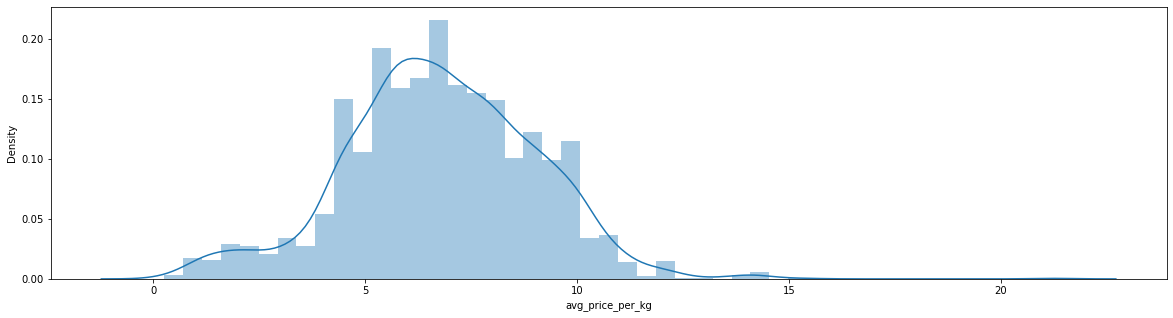

In [26]:
fig, ax = plt.subplots(figsize=(20,5))
sns.distplot(df['avg_price_per_kg'], kde=True)

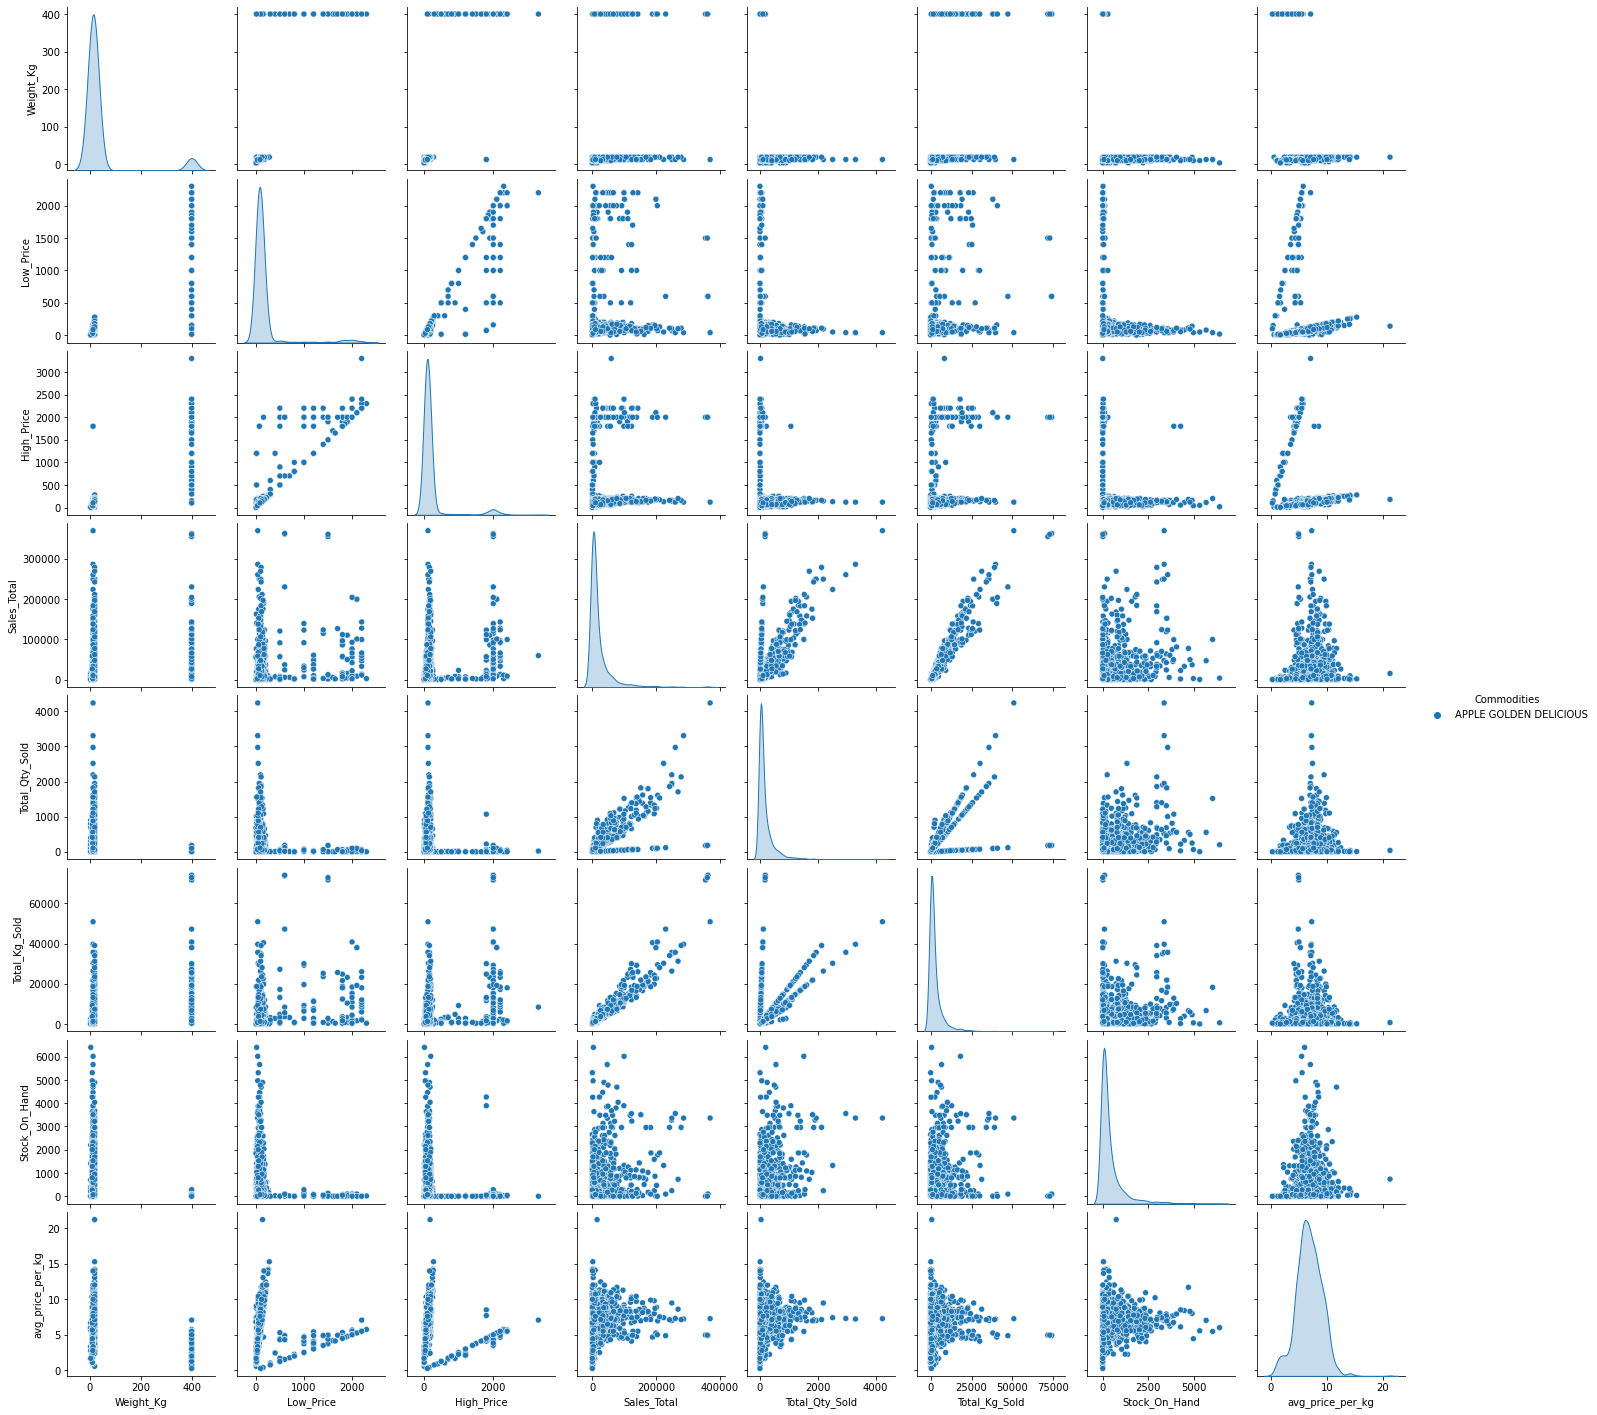

In [27]:
g = sns.pairplot(df[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 
                           'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg', 'Commodities']], hue='Commodities')

In [28]:
dummy_df = pd.get_dummies(df)
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_CAPE,Province_EASTERN CAPE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,1,0,...,0,1,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,1,0,...,0,0,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,1,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,0,1,...,0,0,0,0,0,0,0,1,0,0


In [29]:
column_titles = [col for col in dummy_df.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df=dummy_df.reindex(columns=column_titles)

In [30]:
# Target correlations with features
corrs = pd.DataFrame(dummy_df.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs.head(15)

,Correlation
avg_price_per_kg,1.000000
Container_M4183,0.403229
Size_Grade_1L,0.280966
Province_W.CAPE-BERGRIVER ETC,0.262051
Size_Grade_1X,0.251451
Container_EC120,0.188162
Size_Grade_1M,0.175779
Container_EF120,0.114297
Sales_Total,0.108473
Stock_On_Hand,0.105028


In [31]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
#corr = X_data.corr()
r, c = np.where(np.abs(corrs) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corrs.iloc[r[off_diagonal], c[off_diagonal]]

""


In [32]:
missing_values_table(dummy_df)

Your selected dataframe has 184 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [33]:
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_CAPE,Province_EASTERN CAPE,Province_NATAL,...,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,1,0,0,...,1,0,0,0,0,0,0,0,0,8.51
7,11.0,50.0,50.0,16000.0,320,3520.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4.55
24,9.0,55.0,55.0,990.0,18,162.0,1506,0,0,0,...,0,0,0,0,0,0,0,0,0,6.11
40,18.3,80.0,120.0,32020.0,388,7100.4,443,1,0,0,...,0,0,0,0,0,0,0,0,0,4.51
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,0,1,0,...,0,0,0,0,0,0,1,0,0,4.50


In [34]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [35]:
# Our model will be the same throughout, so will our y
model = LinearRegression(n_jobs=-1)
y = df['avg_price_per_kg']
y.shape

(1952,)

In [36]:
# fit the model to the data and make predictions 
X = df['Total_Kg_Sold'].values.reshape(-1, 1)
fit_and_evaluate(model,X,y)

{'Train RMSE': 2.2703968528488527,
 'Train R^2': 1.248611078508155e-05,
 'Test RMSE': 2.1579153413630325,
 'Test R^2': -0.0035534384987239154}

In [37]:
# fit the model to the data and make predictions 
X = df['Total_Kg_Sold'].values.reshape(-1, 1)
fit_and_evaluate(model,X,y)

{'Train RMSE': 2.2703968528488527,
 'Train R^2': 1.248611078508155e-05,
 'Test RMSE': 2.1579153413630325,
 'Test R^2': -0.0035534384987239154}

In [38]:
# fit the model to the data and make predictions 
X = df['Total_Qty_Sold'].values.reshape(-1, 1)
fit_and_evaluate(model,X,y)

{'Train RMSE': 2.2618477207296106,
 'Train R^2': 0.007529171816654134,
 'Test RMSE': 2.148939987640795,
 'Test R^2': 0.004777301015136515}

In [40]:
# save the model
import pickle
model_load_path = r"C:\Users\onkar\regression-apples-predict-api-template\assets\trained-models\apples_simple_lm_regression.pkl"
with open(model_load_path,'rb') as file:
    mod = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\onkar\\regression-apples-predict-api-template\\assets\\trained-models\\apples_simple_lm_regression.pkl'

In [41]:
df.shape,test.shape

((1952, 13), (685, 13))

In [42]:
X_real = pd.get_dummies(test)
X_real.head()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_CAPE,Province_EASTERN CAPE,...,Date_2020-09-03,Date_2020-09-07,Date_2020-09-09,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
0,1,12.0,128.0,136.0,5008.0,38,456.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.3,220.0,220.0,1760.0,8,146.4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,12.0,120.0,120.0,720.0,6,72.0,45,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,18.3,160.0,160.0,160.0,1,18.3,8,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,18.3,140.0,160.0,14140.0,100,1830.0,19,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
missing_values_table(X_real)

Your selected dataframe has 181 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [59]:
preds = model.predict(X_real)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 181)

# visualise Correlations

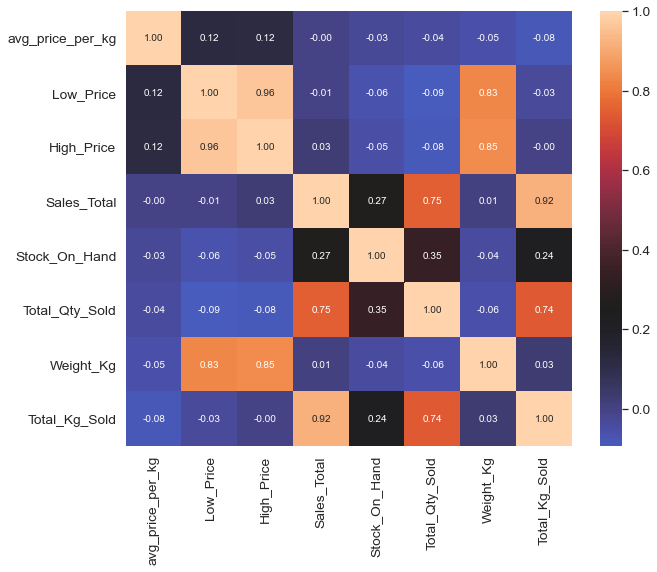

In [46]:
plt.figure(figsize=(10,8))

#avg_price_per_kg correlation matrix
cols = train.corr().nlargest(10, 'avg_price_per_kg')['avg_price_per_kg'].index
corr_mat = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)

#Plot corr matrix
sns.heatmap(corr_mat, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, center=0.25)
plt.show()

# Outliers


we will visualise and remove outliers of columns that have a 0.6(or higher) correlation of avg_price_per_kg

# Low_price

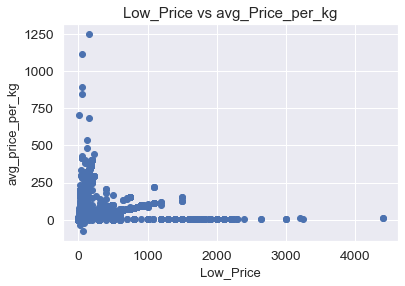

In [49]:
fig, ax = plt.subplots()
ax.scatter(x = train['Low_Price'], y = train['avg_price_per_kg'])
plt.ylabel('avg_price_per_kg', fontsize=13)
plt.xlabel('Low_Price', fontsize=13)
plt.title('Low_Price vs avg_Price_per_kg')
plt.show()

We dont see any easy way to remove outliers in 'Low_Prices vs avg_price_per_kg', so we will take care of this ny using a Robust Scalar in models that are sensitive to outliers

# High_Price

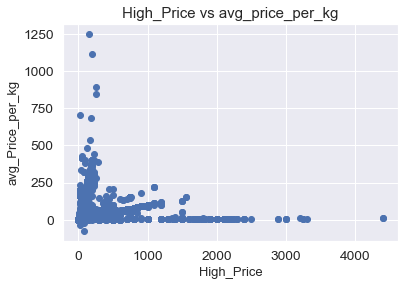

In [51]:
fig, ax = plt.subplots()
ax.scatter(x = train['High_Price'], y = train['avg_price_per_kg'])
plt.ylabel('avg_Price_per_kg', fontsize=13)
plt.xlabel('High_Price', fontsize=13)
plt.title('High_Price vs avg_price_per_kg')
plt.show()

We notice two obvious outliers in 'High_Price vs Avg_price_per_kg', so we remove them.

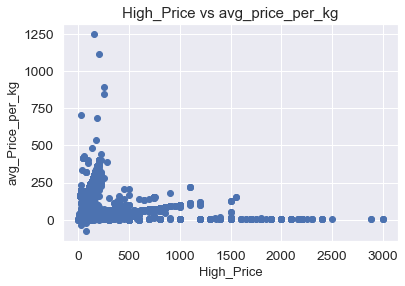

In [52]:
#Deleting outliers
train = train.drop(train[(train['High_Price']>3000) & (train['avg_price_per_kg']<30000)].index)

#check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = train['High_Price'], y = train['avg_price_per_kg'])
plt.ylabel('avg_Price_per_kg', fontsize=13)
plt.xlabel('High_Price', fontsize=13)
plt.title('High_Price vs avg_price_per_kg')
plt.show()

# Sales_Total

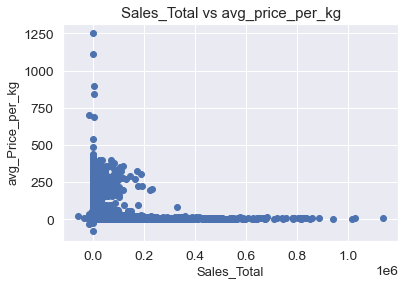

In [53]:
fig, ax = plt.subplots()
ax.scatter(x = train['Sales_Total'], y = train['avg_price_per_kg'])
plt.ylabel('avg_Price_per_kg', fontsize=13)
plt.xlabel('Sales_Total', fontsize=13)
plt.title('Sales_Total vs avg_price_per_kg')
plt.show()

As a general rule for our data, we will not be removing any outliers from discrete data. We will just scale our data before using models that are sensitive to outliers.

# Stock_on_Hand

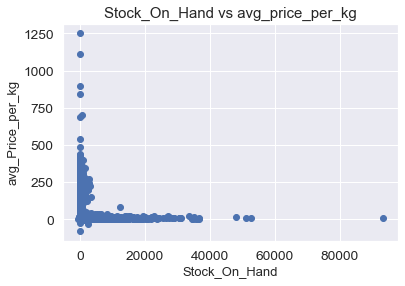

In [55]:
fig, ax = plt.subplots()
ax.scatter(x = train['Stock_On_Hand'], y = train['avg_price_per_kg'])
plt.ylabel('avg_Price_per_kg', fontsize=13)
plt.xlabel('Stock_On_Hand', fontsize=13)
plt.title('Stock_On_Hand vs avg_price_per_kg')
plt.show()

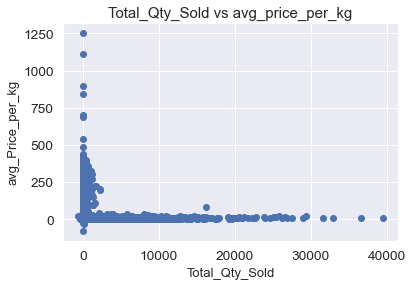

In [56]:
fig, ax = plt.subplots()
ax.scatter(x = train['Total_Qty_Sold'], y = train['avg_price_per_kg'])
plt.ylabel('avg_Price_per_kg', fontsize=13)
plt.xlabel('Total_Qty_Sold', fontsize=13)
plt.title('Total_Qty_Sold vs avg_price_per_kg')
plt.show()

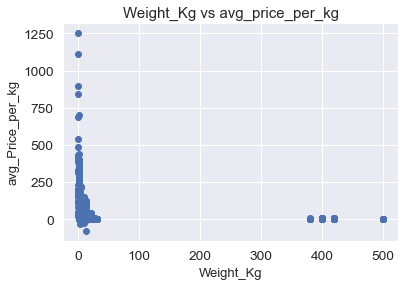

In [57]:
fig, ax = plt.subplots()
ax.scatter(x = train['Weight_Kg'], y = train['avg_price_per_kg'])
plt.ylabel('avg_Price_per_kg', fontsize=13)
plt.xlabel('Weight_Kg', fontsize=13)
plt.title('Weight_Kg vs avg_price_per_kg')
plt.show()

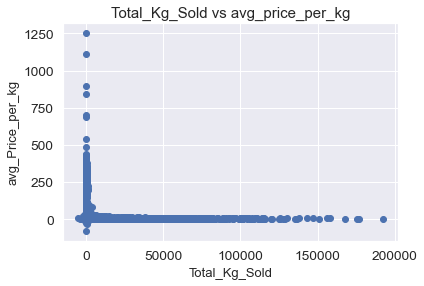

In [58]:
fig, ax = plt.subplots()
ax.scatter(x = train['Total_Kg_Sold'], y = train['avg_price_per_kg'])
plt.ylabel('avg_Price_per_kg', fontsize=13)
plt.xlabel('Total_Kg_Sold', fontsize=13)
plt.title('Total_Kg_Sold vs avg_price_per_kg')
plt.show()

# There are other probably outliers in the training data.
However, removing them all may badly affect our models if ever there were also outliers in the test data.
Instead of removing them all, we will just manage to make some of our models robust(using Robust Scalar) on them.

# Target Variable

In [60]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Let's look at the distribution of the Target Variable

C:\Users\mellow\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'avg_price')

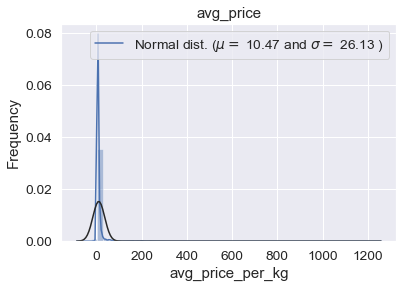

In [68]:
sns.distplot(train['avg_price_per_kg'], fit=norm);

#Get the fitted Parameters used by the function
(mu,sigma) = norm.fit(train['avg_price_per_kg'])

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'. format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('avg_price')

# We transform this variable and make it more normally distributed.

C:\Users\mellow\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mellow\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Avg_Prices')

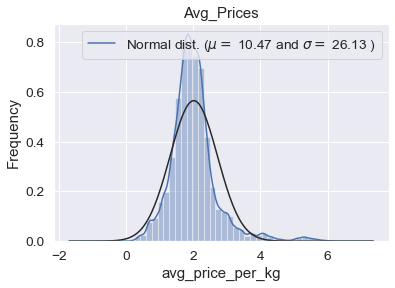

In [69]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train['avg_price_per_kg'] = np.log1p(train['avg_price_per_kg'])

#Check the new distribution 
sns.distplot(train['avg_price_per_kg'] , fit=norm);

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Avg_Prices')

# Feature Engineering

Concatenating the train and test datasets in the beginning helps us engineer the features of both datasets at the same time. We will separate them later.


In [74]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.avg_price_per_kg.values
features = pd.concat((train, test), sort=False).reset_index(drop=True)
features.drop(['avg_price_per_kg'], axis=1, inplace=True)
features.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Index
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,NaN
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,NaN
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,NaN
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,NaN
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,NaN


# Dealing with Nulls

## Let's find all columns that have nulls

In [75]:
features_na = (features.isnull().sum() / len(features)) * 100
features_na = features_na.drop(features_na[features_na == 0].index).sort_values(ascending=False)[:20]
missing_data = pd.DataFrame({'Missing Ratio' :features_na})
missing_data

,Missing Ratio
Index,98.947045


Text(0.5, 1.0, 'Percent missing data')

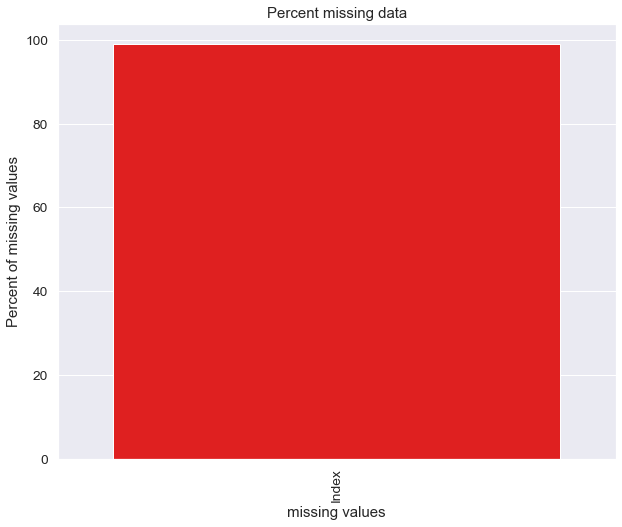

In [78]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=features_na.index, y=features_na, color='red')
plt.xlabel('missing values')
plt.ylabel('Percent of missing values')
plt.title('Percent missing data')

# Dealing with categorical Vars

In [80]:
# get dummies all categorical(object) columns

categorical_cols = features.select_dtypes(include=['object']).columns
for col in categorical_cols:
    dum = pd.get_dummies(features[col],prefix=col, drop_first=True)
    features.drop(col,axis=1,inplace=True)
    features = pd.concat([features,dum],axis=1)
print(features.shape)

(65055, 642)


# Train_test_split



In [81]:
train = features[:ntrain]
test = features[ntrain:]

In [82]:
train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Index,Province_EASTERN CAPE,Province_EASTERN FREESTATE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
0,12.0,108.0,112.0,3236.0,29,348.0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18.3,150.0,170.0,51710.0,332,6075.6,822,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0
2,20.0,70.0,80.0,4860.0,66,1320.0,50,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.0,60.0,60.0,600.0,10,90.0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.0,40.0,45.0,41530.0,927,9270.0,393,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


# Cross Validation Scoring Strategy¶
We use cross validation instead of a normal train_test_split to split our train set.

In [85]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

This validation function uses kfold falidation to make a train_test_split of the training data. The evaluation metric is root mean squared error(rmse). It becomes root mean squared log error(rmsle) because our Target Variable has been log transformed

In [86]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse

# Multiple Linear Regression

Here our model is:
           predicting the average price per kilogram of Golden Delicous Apples, the formula is given by:

Where  is the total number of predictions generated for the average price per kilogram of Golden Delicous Apples, with  and  being the true and predicted prices.

In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression

In [89]:
reg = LinearRegression()